### Student Activity: Portfolio Planner Part 2

This program is part 2 of a two-part student activity and continues the following:

`PART I: Portfolio Optimization via Risk Evaluation`

Reads in the CSV datasets of 10 stocks, calculates the volatility of each stock, drops the top-five highly volatile stocks, sets allocations for the remaining stocks based on risk/volatility, and calculates the returns of a hypothetical `$10,000` investment for the constructed portfolio.

`PART II: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations`

Alternatively filters the same 10 stocks (from part 1) down to only minimally-correlated stocks with higher sharpe ratios, and calculates the returns of a hypothetical `$10,000` investment for the constructed optimized portfolio. Returns of the optimized portfolio are then compared to lesser-optimized portfolios.

---

### PART I: Portfolio Optimization via Risk Evaluation

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSVs as DataFrames 

In [2]:
# Set the file paths
bk_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/bk_data.csv")
fang_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/fang_data.csv")
jnj_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/jnj_data.csv")
luv_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/luv_data.csv")
mu_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/mu_data.csv")
nke_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/nke_data.csv")
sbux_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/sbux_data.csv")
t_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/t_data.csv")
wdc_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/wdc_data.csv")
wrk_data = Path("../08-Stu_Portfolio_Planner_Part_I/Resources/wrk_data.csv")

# Read the CSVs and set the `date` column as a datetime index to the DataFrame
bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
fang_df = pd.read_csv(fang_data, index_col="date", infer_datetime_format=True, parse_dates=True)
jnj_df = pd.read_csv(jnj_data, index_col="date", infer_datetime_format=True, parse_dates=True)
luv_df = pd.read_csv(luv_data, index_col="date", infer_datetime_format=True, parse_dates=True)
mu_df = pd.read_csv(mu_data, index_col="date", infer_datetime_format=True, parse_dates=True)
nke_df = pd.read_csv(nke_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sbux_df = pd.read_csv(sbux_data, index_col="date", infer_datetime_format=True, parse_dates=True)
t_df = pd.read_csv(t_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wdc_df = pd.read_csv(wdc_data, index_col="date", infer_datetime_format=True, parse_dates=True)
wrk_df = pd.read_csv(wrk_data, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display a few rows
wrk_df.head()

/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_94758/2635170573.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_94758/2635170573.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bk_df = pd.read_csv(bk_data, index_col="date", infer_datetime_format=True, parse_dates=True)
/var/folders/r4/jh2rbs2n3js2641fckxtvh_c0000gn/T/ipykernel_94758/2635170573.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A str

,close
date,
2019-05-20,35.15
2019-05-17,36.66
2019-05-16,37.42
2019-05-15,37.44
2019-05-14,37.19


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
combined_df = pd.concat([bk_df, fang_df, jnj_df, luv_df, mu_df, nke_df, sbux_df, t_df, wdc_df, wrk_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Set column names
combined_df.columns = ['BK', 'FANG', 'JNJ', 'LUV', 'MU', 'NKE', 'SBUX', 'T', 'WDC', 'WRK']

# Display a few rows
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,99.33,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,99.12,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,99.64,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,97.68,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,97.46,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


<Axes: xlabel='date'>

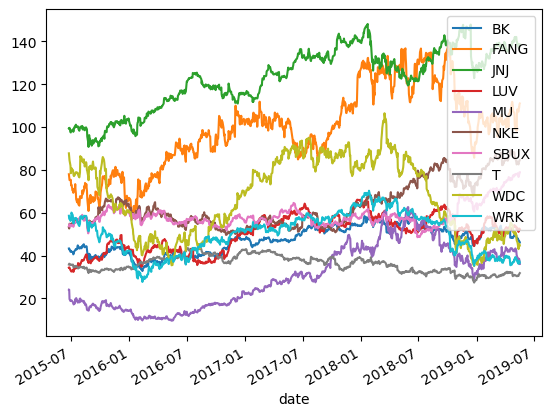

In [4]:
combined_df.plot()

### Calculate Daily Returns

In [5]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


<Axes: xlabel='date'>

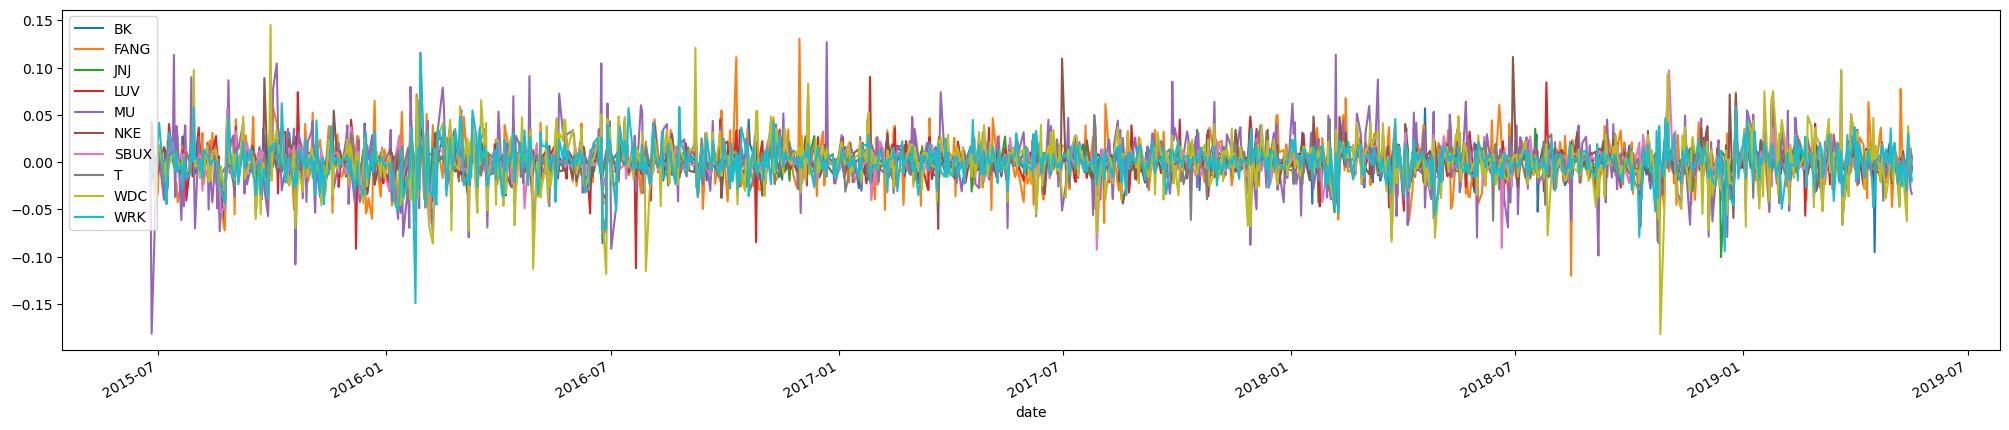

In [6]:
daily_returns.plot(figsize=(25, 5))

### Evaluate Riskiness of Stocks

In [7]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

JNJ     0.161208
T       0.187571
SBUX    0.206388
BK      0.225078
NKE     0.245942
LUV     0.280153
WRK     0.303048
FANG    0.370971
WDC     0.414714
MU      0.479754
dtype: float64

### Drop High Volatility Stocks

In [8]:
# Drop the 5 stocks with the highest volatility in daily returns
daily_returns.drop(columns=['MU', 'WDC', 'FANG', 'WRK', 'LUV'], inplace=True)
daily_returns.head()

,BK,JNJ,NKE,SBUX,T
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.002114,-0.009414,0.006703,0.011179
2015-06-26,0.003034,0.005246,0.042672,0.010172,-0.001658
2015-06-29,-0.027687,-0.019671,-0.018594,-0.019590,-0.009690
2015-06-30,0.004307,-0.002252,0.003251,0.001214,-0.006989


### Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns

In [9]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# BK, LUV, NKE, SBUX, T
weights = [0.15, 0.05, 0.10, 0.2, 0.50]
portfolio_returns = daily_returns.dot(weights)
portfolio_returns.head()

date
2015-06-24         NaN
2015-06-25    0.004358
2015-06-26    0.006190
2015-06-29   -0.015759
2015-06-30   -0.002393
dtype: float64

### Calculate Cumulative Returns

In [10]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()
cumulative_returns.head()

date
2015-06-24         NaN
2015-06-25    1.004358
2015-06-26    1.010575
2015-06-29    0.994650
2015-06-30    0.992269
dtype: float64

### Plot Return of Portfolio Starting with Initial Investment of `$10,000`

<Axes: xlabel='date'>

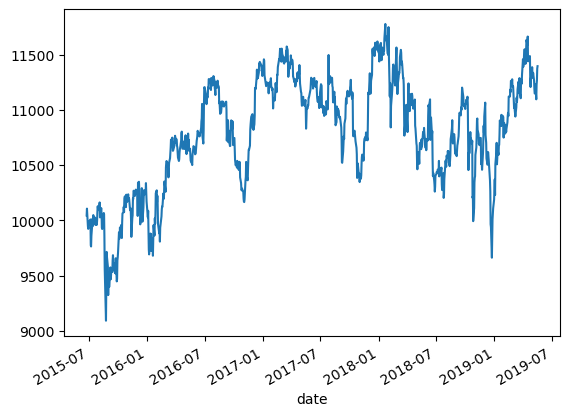

In [11]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

---

### PART 2: Portfolio Optimization via Correlation and Return-to-risk (Sharpe Ratio) Evaluations

### Reset Daily Returns DataFrame

In [12]:
# Re-calculate daily returns as the DataFrame was modified in part 1
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


### Evaluate Correlation of Stock Returns

In [13]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()
correlation

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
BK,1.000000,0.317415,0.350043,0.390701,0.339585,0.352398,0.361697,0.285015,0.374107,0.474000
FANG,0.317415,1.000000,0.220819,0.169875,0.258304,0.227417,0.210578,0.187788,0.259871,0.293574
JNJ,0.350043,0.220819,1.000000,0.248226,0.173405,0.297239,0.366992,0.343954,0.223558,0.295495
LUV,0.390701,0.169875,0.248226,1.000000,0.296650,0.285643,0.314633,0.221281,0.273849,0.294478
MU,0.339585,0.258304,0.173405,0.296650,1.000000,0.194839,0.244798,0.175836,0.608620,0.404035
NKE,0.352398,0.227417,0.297239,0.285643,0.194839,1.000000,0.396923,0.242009,0.240615,0.269157
SBUX,0.361697,0.210578,0.366992,0.314633,0.244798,0.396923,1.000000,0.241703,0.277486,0.300593
T,0.285015,0.187788,0.343954,0.221281,0.175836,0.242009,0.241703,1.000000,0.156152,0.284472
WDC,0.374107,0.259871,0.223558,0.273849,0.608620,0.240615,0.277486,0.156152,1.000000,0.394665
WRK,0.474000,0.293574,0.295495,0.294478,0.404035,0.269157,0.300593,0.284472,0.394665,1.000000


<Axes: >

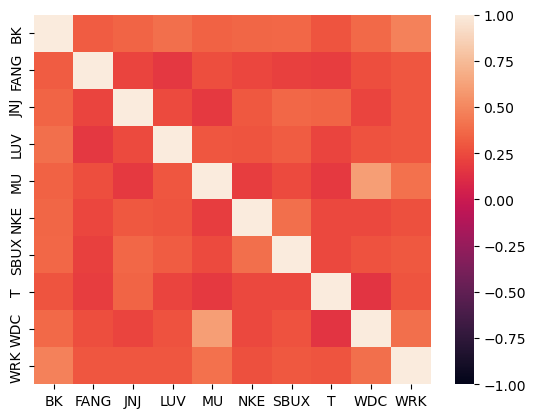

In [14]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [15]:
# Alternatively, sum total correlation for each stock
correlation.sum(axis=0).sort_values()

T       3.138209
FANG    3.145640
LUV     3.495337
NKE     3.506240
JNJ     3.519732
MU      3.696071
SBUX    3.715404
WDC     3.808923
WRK     4.010469
BK      4.244961
dtype: float64

### Drop the Two Most Consistently Correlated Stocks

In [16]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = daily_returns.drop(columns=['WRK', 'BK'])
noncorrelated_daily_returns.head()

,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC
date,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020076,-0.002114,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290
2015-06-26,-0.014923,0.005246,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452
2015-06-29,-0.001196,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485
2015-06-30,0.002927,-0.002252,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192


*Note*: selecting which two to drop is a little subjective: here `WRK` and `BK` were dropped because looking at the heatmap form of the correlation matrix, they appeared to have the consistently highest temperatures (lightest colors); in other words, they had the consistently highest correlation with all of the other stocks. 

If we wanted to be more systematic, one potential approach would be to sum each stock's total correlation and then compare. The code for that approach, shown just above, produces the same conclusions.

### Evaluate Reward-to-Risk (Sharpe Ratio) of Minimally-Correlated Stocks

In [17]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))
sharpe_ratios

FANG    0.430054
JNJ     0.612247
LUV     0.525174
MU      0.457035
NKE     0.608009
SBUX    0.582550
T      -0.067065
WDC    -0.209314
dtype: float64

In [18]:
sharpe_ratios.sort_values()

WDC    -0.209314
T      -0.067065
FANG    0.430054
MU      0.457035
LUV     0.525174
SBUX    0.582550
NKE     0.608009
JNJ     0.612247
dtype: float64

### Drop the Three Lowest Sharpe Ratio Stocks

In [19]:
# Drop the lowest sharpe ratio stocks and keep only the postive sharpe ratio stocks
candidate_daily_returns = noncorrelated_daily_returns.drop(columns=['T', 'WDC', 'FANG'])
candidate_daily_returns.head()

,JNJ,LUV,MU,NKE,SBUX
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.002114,0.004076,-0.001663,-0.009414,0.006703
2015-06-26,0.005246,-0.004929,-0.181515,0.042672,0.010172
2015-06-29,-0.019671,-0.033217,-0.047304,-0.018594,-0.019590
2015-06-30,-0.002252,-0.002712,0.005873,0.003251,0.001214


### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

<Axes: xlabel='date'>

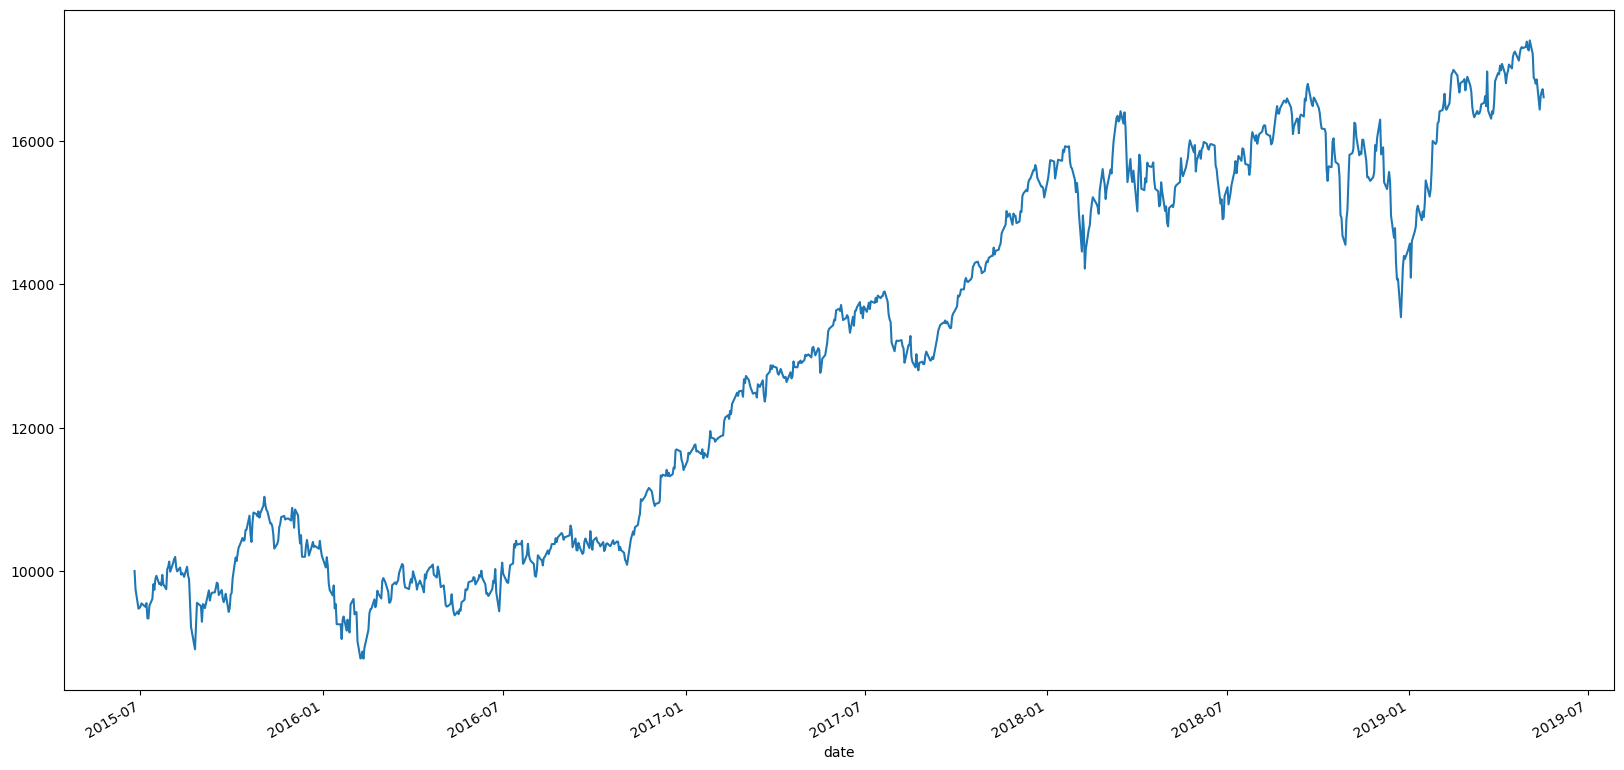

In [20]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Optimized Portfolio
initial_investment = 10000
weights = [.2, .2, .2, .2, .2]
candidate_portfolio_returns = candidate_daily_returns.dot(weights)
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)
candidate_cumulative_profits.plot(figsize=(20,10))

### Evaluate Investment in Non-Correlated (Diversified) Portfolio

<Axes: xlabel='date'>

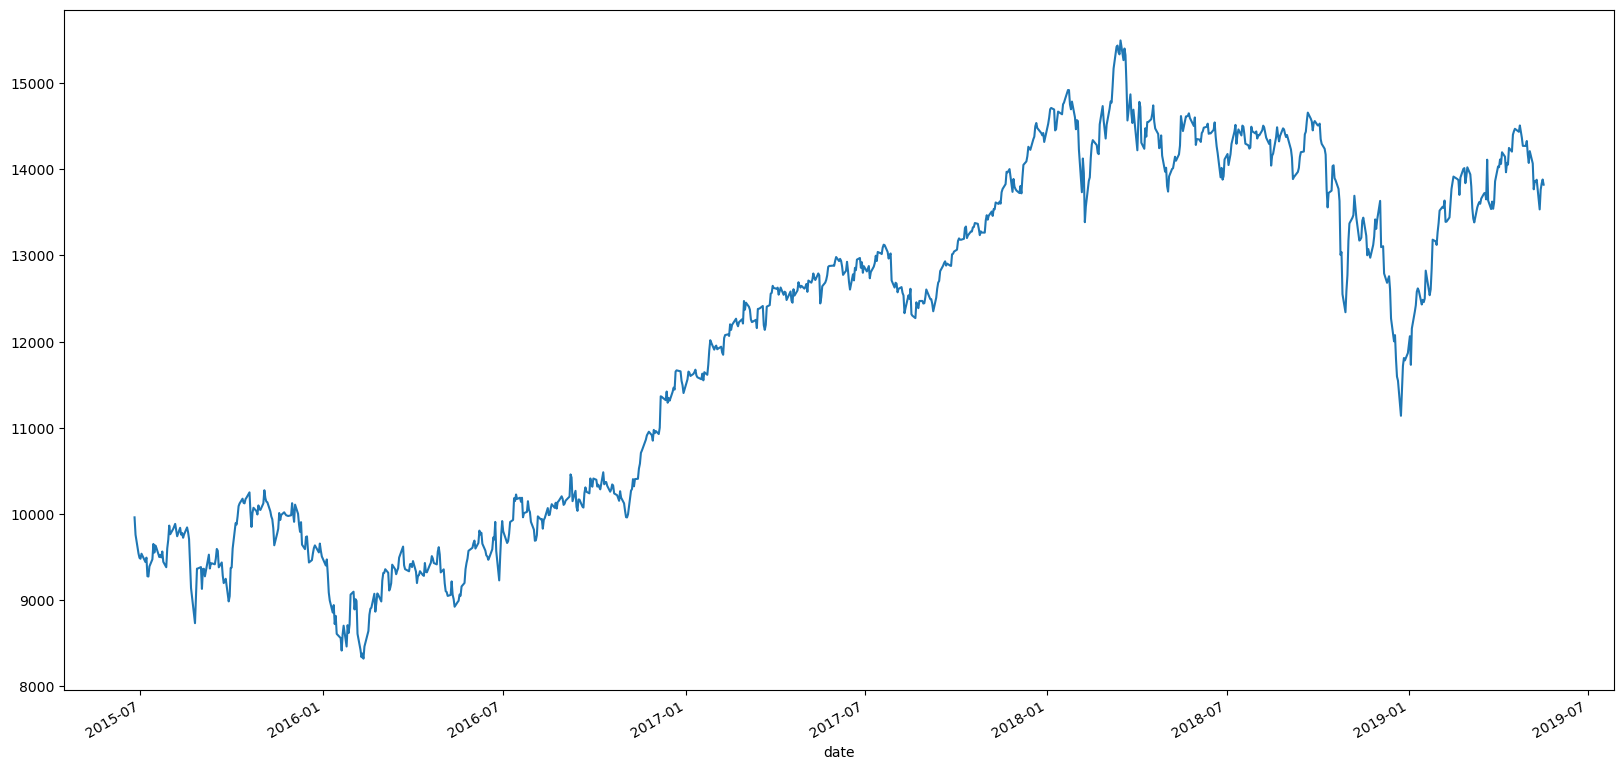

In [21]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Uncorrelated Portfolio
initial_investment = 10000
weights = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]
noncorrelated_portfolio_returns = noncorrelated_daily_returns.dot(weights)
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)
noncorrelated_cumulative_profits.plot(figsize=(20,10))

### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

<Axes: xlabel='date'>

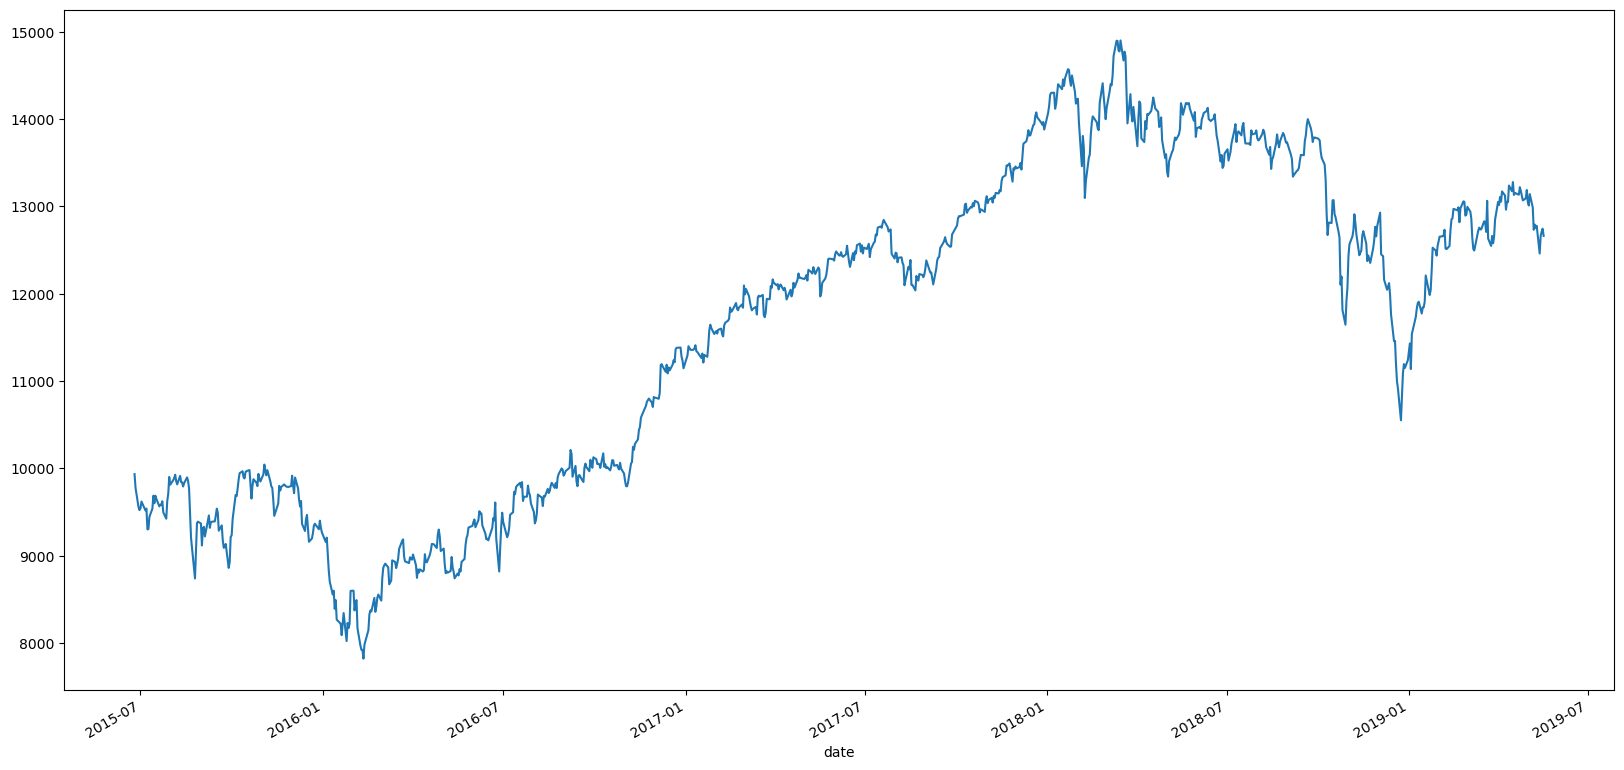

In [22]:
# Set Portfolio Weights, Calculate Daily and Cumulative Portfolio Returns, and Plot $10,000 Investment Over Time for Unoptimized Portfolio
initial_investment = 10000
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
unoptimized_portfolio_returns = daily_returns.dot(weights)
unoptimized_cumulative_returns = (1 + unoptimized_portfolio_returns).cumprod()
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_returns)
unoptimized_cumulative_profits.plot(figsize=(20,10))

### Overlay Hypothetical Portfolio Investments

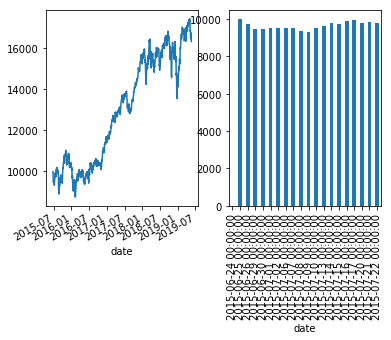

In [ ]:
import matplotlib.pyplot as plt

fig, myAxes=plt.subplots(1, 2)

candidate_cumulative_profits.plot(ax=myAxes[0])
candidate_cumulative_profits.head(20).plot(kind='bar', ax=myAxes[1])

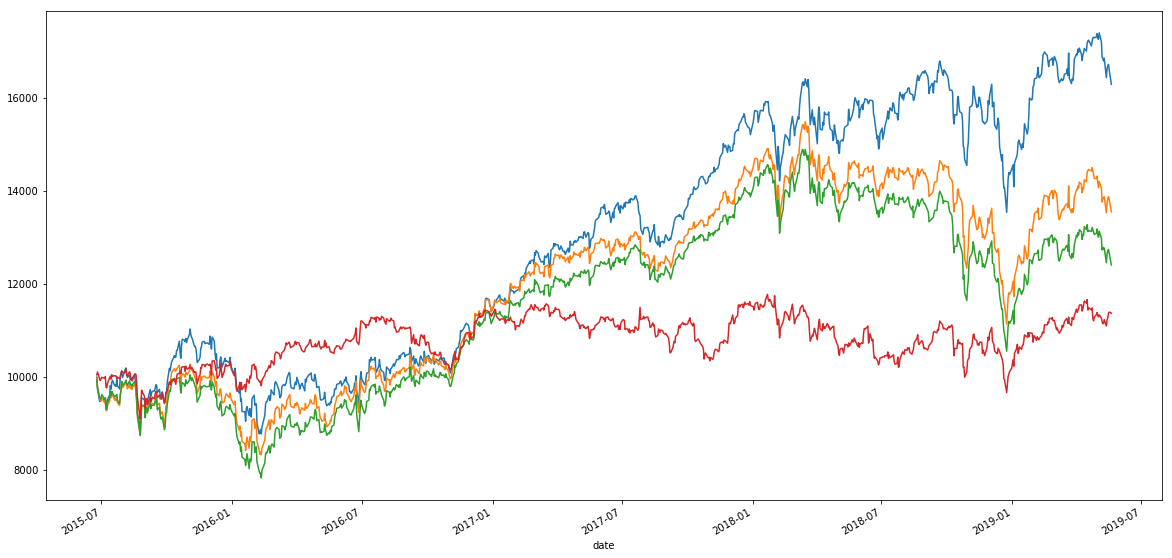

In [ ]:
# Set the figure of the chart and plot each data trend on the single figure
ax = candidate_cumulative_profits.plot(figsize=(20,10))
noncorrelated_cumulative_profits.plot(ax=ax)
unoptimized_cumulative_profits.plot(ax=ax)
cumulative_profit.plot(ax=ax)

ax.legend(['PART 2: Diversified and Return-to-Risk Optimized Portfolio $10,000', 
           'PART 2: Diversified Portfolio $10,000', 
           'PART 2: Original/Unoptimized Portfolio $10,000', 
           'PART 1: Risk-Optimized Portfolio $10,000'])